# Homework 1

***
$$Abstract$$


This notebook if for part of the exercises of the chapter 1~4 of the book "Applied Multivariate Statistical Analysis" by Richard A. Johnson.

***



## exercise 1.12 



### (a) 

$P = (-3,4)$  
$d(O,P) = max(|-3|,|-4|) = 4$
  
  
We can reasonably infer from the given figure that the shape is a square with a side length of 2, and that the sides of the square are parallel to the coordinate axes, with the center coinciding with the origin. In other words, the four vertices of the square are (-1, -1), (1, -1), (1, 1), and (-1, 1).

### (b)
> *"Plot the locus of points whose squared distance from the origin is 1."*

$d(O,P) = max(|x_1|,|x_2|) = 1$  
So we get two cases:  
$$
\begin{cases}
x_1 = \pm 1\\
-1 \leq x_2 \leq 1
\end{cases}
$$
Or it's also possible that:
$$
\begin{cases}
-1 \leq x_1 \leq 1 \\
x_2 = \pm 1
\end{cases}
$$
So we can get the following figure:



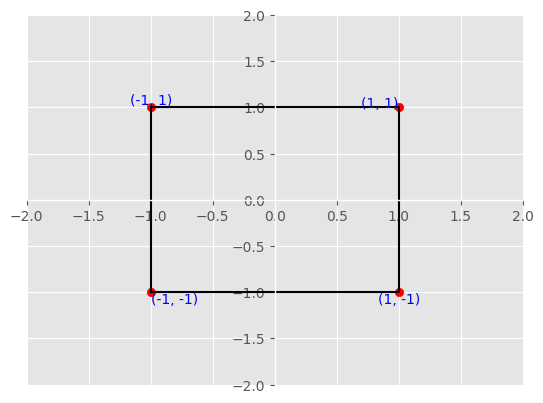

In [83]:
import matplotlib.pyplot as plt

# 创建一个新的图形
fig, ax = plt.subplots()

# 绘制坐标轴
ax.axhline(0, color='black',linewidth=0.5)
ax.axvline(0, color='black',linewidth=0.5)

# 添加坐标轴箭头
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# 标出坐标点
ax.scatter(1, 1, color='red', marker='o')
ax.scatter(-1, 1, color='red', marker='o')
ax.scatter(-1, -1, color='red', marker='o')
ax.scatter(1, -1, color='red', marker='o')

# 添加坐标点标签
ax.text(1, 1, '(1, 1)', fontsize=10, ha='right', color='blue')
ax.text(-1, 1, '(-1, 1)', fontsize=10, ha='center', va='bottom', color='blue')
ax.text(-1, -1, '(-1, -1)', fontsize=10, ha='left',va='top', color='blue')
ax.text(1, -1, '(1, -1)', fontsize=10, ha='center', va='top', color='blue')

# 设置坐标轴范围
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)

# 绘制图形
ax.plot([-1, 1, 1, -1, -1], [-1, -1, 1, 1, -1], color='black')

# 显示图形
plt.show()



The figure shows the square with vertices at (-1, -1), (1, -1), (1, 1), and (-1, 1), which are all at a distance of 1 from the origin.

### (c)
 > *Generalize the foregoing distance expression to points in p dimensions*  
 
 In p dimensions, the distance between two points $P_1(x_1, x_2, ..., x_p)$ and $O(0, 0, ..., 0)$ is defined as the maximum absolute value of the differences between their coordinates. That is： 
 $$
 d(O,P) = max(|x_1|,|x_2|,...,|x_p|)
 $$


## exercise 1.16
> At the start of a study to determine whether exercise or dietary supplements would slow bone loss in older women, an investigator measured the mineral content of bones by photon absorptiometry. Measurements were recorded for
three bones on the dominant and nondominant sides and are shown in **Table 1.8**. (See also the mineral-content data on the CD-ROM.)
> Compute the $\bar{x}$, $S_n$ , and $R$ arrays. Interpret the pairwise correlations.

In [84]:
# It's the contents of *Table 1.8*
# 1.103 1.052 2.139 2.238 0.873 0.872 0.842 0.859 1.873 1.741 0.590 0.744 0.925 0.873 1.887 1.809 0.767 0.713 0.857 0.744 1.739 1.547 0.706 0.674 0.795 0.809 1.734 1.715 0.549 0.654 0.787 0.779 1.509 1.474 0.782 0.571 0.933 0.880 1.695 1.656 0.737 0.803 0.799 0.851 1.740 1.777 0.618 0.682 0.945 0.876 1.811 1.759 0.853 0.777 0.921 0.906 1.954 2.009 0.823 0.765 0.792 0.825 1.624 1.657 0.686 0.668 0.815 0.751 2.204 1.846 0.678 0.546 0.755 0.724 1.508 1.458 0.662 0.595 0.880 0.866 1.786 1.811 0.810 0.819 0.900 0.838 1.902 1.606 0.723 0.677 0.764 0.757 1.743 1.794 0.586 0.541 0.733 0.748 1.863 1.869 0.672 0.752 0.932 0.898 2.028 2.032 0.836 0.805 0.856 0.786 1.390 1.324 0.578 0.610 0.890 0.950 2.187 2.087 0.758 0.718 0.688 0.532 1.650 1.378 0.533 0.482 0.940 0.850 2.334 2.225 0.757 0.731 0.493 0.616 1.037 1.268 0.546 0.615 0.835 0.752 1.509 1.422 0.618 0.664 0.915 0.936 1.971 1.869 0.869 0.868
import numpy as np
import pandas as pd
data = '1.103 1.052 2.139 2.238 0.873 0.872 0.842 0.859 1.873 1.741 0.590 0.744 0.925 0.873 1.887 1.809 0.767 0.713 0.857 0.744 1.739 1.547 0.706 0.674 0.795 0.809 1.734 1.715 0.549 0.654 0.787 0.779 1.509 1.474 0.782 0.571 0.933 0.880 1.695 1.656 0.737 0.803 0.799 0.851 1.740 1.777 0.618 0.682 0.945 0.876 1.811 1.759 0.853 0.777 0.921 0.906 1.954 2.009 0.823 0.765 0.792 0.825 1.624 1.657 0.686 0.668 0.815 0.751 2.204 1.846 0.678 0.546 0.755 0.724 1.508 1.458 0.662 0.595 0.880 0.866 1.786 1.811 0.810 0.819 0.900 0.838 1.902 1.606 0.723 0.677 0.764 0.757 1.743 1.794 0.586 0.541 0.733 0.748 1.863 1.869 0.672 0.752 0.932 0.898 2.028 2.032 0.836 0.805 0.856 0.786 1.390 1.324 0.578 0.610 0.890 0.950 2.187 2.087 0.758 0.718 0.688 0.532 1.650 1.378 0.533 0.482 0.940 0.850 2.334 2.225 0.757 0.731 0.493 0.616 1.037 1.268 0.546 0.615 0.835 0.752 1.509 1.422 0.618 0.664 0.915 0.936 1.971 1.869 0.869 0.868'
data = data.split(" ")
data = [float(x) for x in data]
data = np.array(data)
data.resize((25,6))

df = pd.DataFrame(data)
df.columns = ['Dominant radius', 'Radius', 'Dominant humerus',\
              'Humerus', 'Dominant ulna', 'Ulna']
df

,Dominant radius,Radius,Dominant humerus,Humerus,Dominant ulna,Ulna
0,1.103,1.052,2.139,2.238,0.873,0.872
1,0.842,0.859,1.873,1.741,0.590,0.744
2,0.925,0.873,1.887,1.809,0.767,0.713
3,0.857,0.744,1.739,1.547,0.706,0.674
4,0.795,0.809,1.734,1.715,0.549,0.654
5,0.787,0.779,1.509,1.474,0.782,0.571
6,0.933,0.880,1.695,1.656,0.737,0.803
7,0.799,0.851,1.740,1.777,0.618,0.682
8,0.945,0.876,1.811,1.759,0.853,0.777
9,0.921,0.906,1.954,2.009,0.823,0.765


In [85]:
# average x
x_bar = data.mean(axis = 0)
x_bar

array([0.8438 , 0.81832, 1.79268, 1.73484, 0.7044 , 0.69384])

That's our $\bar{x}$.

Now we're gonna try to figure the marix $S_n$ out.

The covariance,$s_{kl}=n^{-1}\Sigma^{n}_{j=1}(x_{jk}-\bar{x_k})(x_{jl}-\bar{x_l})$

That is to say that $S_n = n^{-1}Y^T Y$, in which $Y$ means:

$$
Y=
\begin{bmatrix}
x_{1,1}-\bar{x_1} & x_{1,2}-\bar{x_2} & \cdots & x_{1,6}-\bar{x_6} \\
x_{2,1}-\bar{x_1} & x_{2,2}-\bar{x_2} & \cdots & x_{2,6}-\bar{x_6} \\
\vdots & \vdots & \ddots & \vdots \\
x_{25,1}-\bar{x_1} & x_{25,2}-\bar{x_2} & \cdots & x_{25,6}-\bar{x_6}
\end{bmatrix}
$$

In [86]:
# Now we get Y
Y = data.T
for i in range(6):
    Y[i] = data.T[i] - x_bar[i]
Y = Y.T
n = 25
Sn = ((n)**(-1)) * (Y.T @ Y)
Sn

array([[0.01248152, 0.0099633 , 0.02145598, 0.01928225, 0.00875588,
        0.00763953],
       [0.0099633 , 0.01096118, 0.01779378, 0.02025553, 0.00818859,
        0.00855217],
       [0.02145598, 0.01779378, 0.07714294, 0.06410515, 0.01616345,
        0.01233315],
       [0.01928225, 0.02025553, 0.06410515, 0.06670509, 0.01702606,
        0.01612185],
       [0.00875588, 0.00818859, 0.01616345, 0.01702606, 0.01110568,
        0.0077483 ],
       [0.00763953, 0.00855217, 0.01233315, 0.01612185, 0.0077483 ,
        0.01017517]])

It's the matrix $S_n$ we need, with which we can try to work out the matrix $R$ relying on thematrix $S_n$, for $r_{i,j}=s_{ij}/(\sqrt{s_{ii}}\sqrt{s_{jj}})$.



In [87]:
# Now we get R
R = np.zeros((6,6))
for i in range(6):
    for j in range(6): 
        R[i,j] = Sn[i,j]/((np.sqrt(Sn[i,i])*np.sqrt(Sn[j,j])))
R


array([[1.        , 0.85180667, 0.69145903, 0.6682584 , 0.74369264,
        0.67789411],
       [0.85180667, 1.        , 0.61191568, 0.74909264, 0.74217795,
        0.80979828],
       [0.69145903, 0.61191568, 1.        , 0.89364561, 0.55222154,
        0.44020498],
       [0.6682584 , 0.74909264, 0.89364561, 1.        , 0.62555022,
        0.61882031],
       [0.74369264, 0.74217795, 0.55222154, 0.62555022, 1.        ,
        0.72889193],
       [0.67789411, 0.80979828, 0.44020498, 0.61882031, 0.72889193,
        1.        ]])

Finally we have all three matrices we need. We can have a general summary.

In [88]:
print("average x:\n", x_bar,"\n\nmatrix S_n:\n", Sn, "\n\nmatrix R:\n", R, \
      "\n\n\nmin and max of R:\n", R.min(), R.max())

average x:
 [0.8438  0.81832 1.79268 1.73484 0.7044  0.69384] 

matrix S_n:
 [[0.01248152 0.0099633  0.02145598 0.01928225 0.00875588 0.00763953]
 [0.0099633  0.01096118 0.01779378 0.02025553 0.00818859 0.00855217]
 [0.02145598 0.01779378 0.07714294 0.06410515 0.01616345 0.01233315]
 [0.01928225 0.02025553 0.06410515 0.06670509 0.01702606 0.01612185]
 [0.00875588 0.00818859 0.01616345 0.01702606 0.01110568 0.0077483 ]
 [0.00763953 0.00855217 0.01233315 0.01612185 0.0077483  0.01017517]] 

matrix R:
 [[1.         0.85180667 0.69145903 0.6682584  0.74369264 0.67789411]
 [0.85180667 1.         0.61191568 0.74909264 0.74217795 0.80979828]
 [0.69145903 0.61191568 1.         0.89364561 0.55222154 0.44020498]
 [0.6682584  0.74909264 0.89364561 1.         0.62555022 0.61882031]
 [0.74369264 0.74217795 0.55222154 0.62555022 1.         0.72889193]
 [0.67789411 0.80979828 0.44020498 0.61882031 0.72889193 1.        ]] 


min and max of R:
 0.44020498275924475 1.0000000000000002


In [89]:
print("\n\nPAIRWISE CORRELATION:\n", R[0,1], R[2,3], R[4,5])



PAIRWISE CORRELATION:
 0.851806669013503 0.8936456067369467 0.728891931930953


We're almost certainly sure about the pairwise correlation between the **dominant group** and the **non-dominant group**.
- The correlation between the dominant radius and the radius is 0.851.
- The correlation between the dominant humerus and the humerus is 0.894.
- The correlation between the dominant ulna and the ulna is 0.729.

So the **dominant group** and the **non-dominant group** are **strongly correlated**.

## exercise 2.12

> Show that the determinant of a square symmetric   $p$  &times $p$ matrix $A$ can be expressed as the product of its eigenvalues $\lambda_1$,$\lambda_2$……$\lambda_p$; that is, $\prod_{i=1}^p{\lambda_i}$

Based on our knowledge obtained in Advanced Algebra, we reasonably apply the *spectral decomposition* method to the matrix $A$, then we would get that:
$$A = P^{T} \triangle P$$  
in which   $\triangle$=

$$
\begin{bmatrix}
\lambda_{1} & 0 & \cdots & 0 \\
0 & \lambda_{2} & \cdots & 0 \\
\vdots & \vdots & \ddots & \vdots \\
0 & 0 & \cdots & \lambda_{p}
\end{bmatrix} ,
$$

while the column vectors  the matrix $P$  are also the eigenvectors of the orignal matrix $A$.
According to the definitions of spectral decomposition, we know that  $|P|=1$
Then we find that 
$$
|A| = |P^T||\triangle||P| = |P|^2|\triangle| =|\triangle|=\prod_{i=1}^p{\lambda_i}
$$
Now it’s proven.

## Exercise 2.18
> Consider the sets of points whose “distances” from the origin are given by  
> $$c^2 = 4{x_1}^2+3{x_2}^2-2{\sqrt{2} }x_1x_2$$
> for $c^2=1$ and for $c^2=4$. Determine the major and minor axes of the ellipses of constant distances and their associated lengths. Sketch the ellipses of constant distances and comment on their positions. What will happen as $c^2$ increases?


Note that $c^2=x^T\begin{bmatrix}4&{-\sqrt{2}}\\{-\sqrt{2}}&3\end{bmatrix}x, x=\begin{bmatrix}x_1\\x_2\end{bmatrix}$.  
Perhaps we can find the eigenvalues and eigenvectors of the matrix $\begin{bmatrix}4&{-\sqrt{2}}\\{-\sqrt{2}}&{3}\end{bmatrix}$, then we can get the major and minor axes of the ellipses of constant distances.

In [90]:
import numpy as np
A = np.array([[4, -np.sqrt(2)], [-np.sqrt(2), 3]])
eigvals, eigvecs = np.linalg.eig(A)
eigvals, eigvecs

(array([5., 2.]),
 array([[ 0.81649658,  0.57735027],
        [-0.57735027,  0.81649658]]))

We use Python to calculate the eigenvalues and eigenvectors of the matrix $\begin{bmatrix}4&{-\sqrt{2}}\\{-\sqrt{2}}&{3}\end{bmatrix}$.
Now we can do the following operator:
$$
\begin{bmatrix}4&{-\sqrt{2}}\\{-\sqrt{2}}&{3}\end{bmatrix}
=P\Lambda P^T
$$
$$
P = \begin{bmatrix}0.81649658&0.57735027\\-0.57735027&0.81649658\end{bmatrix} , 
\Lambda = \begin{bmatrix}5&0\\0&2\end{bmatrix}
$$
with which we can infer that
$$
1=X^TP(\frac{1}{c^2}\Lambda)P^TX,$$
which is to say, 

$$
1=(p^TX)^T{ \begin{bmatrix}{\lambda_1/{c^2}}&0\\0&\lambda_2/c^2 \end{bmatrix}}(p^TX)^T  
,
$$
with
$$\lambda_1=5,\lambda_2=2.
$$
In this equation, $p^TX$ is no more than a vector, the direction of which is changed from the original $X$ to the current one. Remember that its length is the same as that of $X$, for $P$ has been normalized.
In this case, an epllise has been depicted perfectly. The minor axe is $\frac{c}{\sqrt\lambda_1}$ , and the major axe is $\frac{c}{\sqrt\lambda_2}$.
  

In [91]:
1/np.sqrt(2),1/np.sqrt(5)

(0.7071067811865475, 0.4472135954999579)

In [92]:
2/np.sqrt(2),2/np.sqrt(5)

(1.414213562373095, 0.8944271909999159)


**For $c^2=1$, major axis length is $1/\sqrt2$ or $0.707$, minor axis length is $1/\sqrt{5}$ or $0.447$.**  

**For $c^2=4$, major axis length is $\sqrt2$ or $1.414$, minor axis length is $2/\sqrt5$ or $0.894$.**  

According to what we get, we find the minor axe is always $\frac{c}{\sqrt\lambda_1}$ , and the major axe is awlays $\frac{c}{\sqrt\lambda_2}$.  
**So as c increases, axes will also increase.**


## exercise 2.19

> Let $A^{\frac{1}{2}}_{(m\times m)} =\sum^{m}_{j=1}\sqrt{\lambda_i}e_ie_i^{T}=P\Lambda P^T$, where $PP^T = P^TP = I$. (The $\lambda_i$’s and the $e_i$’s are the eigenvalues and associated normalized eigenvectors of the matrix $A$.) Show properties (1)—(4) of the square-root matrix in (2-22).

$(Proof)$.

### *(1)*. 
$(A^{1/2})^T=(P \Lambda^{1/2}P^T)^T$, in which $\Lambda =$

$$
\begin{bmatrix}
\lambda_{1}^{1/2} & 0 & \cdots & 0 \\
0 & \lambda_{2}^{1/2} & \cdots & 0 \\
\vdots & \vdots & \ddots & \vdots \\
0 & 0 & \cdots & \lambda_{n}^{1/2}
\end{bmatrix}
$$

Based on our knowledge of Advanced Algebra, we judge that $\Lambda^{1/2}$ is a symmetric matrix, so we reasonably believe that
$$
(A^{1/2})^T=P\Lambda^{1/2}P^T=A^{1/2}
$$

### *(2)*
$$
A^{1/2}A^{1/2}=P\Lambda^{1/2}P^TP\Lambda^{1/2}P^T
=P\Lambda^{1/2}(P^TP)\Lambda^{1/2}P^T$$
$$=P\Lambda^{1/2}I\Lambda^{1/2}P^T=P\Lambda P^T=A$$


### *(3)*
It’s not difficult to make following judgements:
$$(A^{1/2})^{-1}=(P\Lambda P^T)^{-1}=(P^T)^{-1}(\Lambda^T)^{-1}P^{-1}$$
Based on what we learn about Advanced Algebra, we believe that $P^{T}P=I$, which is equivalent to that $P^T=P^{-1}$.  

Since the $\Lambda^{-\frac{1}{2}}$ is defined by the textbook to be a diagonal matrix, with $(\lambda_i^{-1/2})$ to be the i$th$ diagonal element.
Undoubtedly, according to the properties of diagonal matrices, $\Lambda^{1/2}\Lambda^{-1/2}=diag(\lambda^{1/2}_i\lambda^{-1/2}_i) for i=1,2,3…n$, which is to say that
$$\Lambda^{1/2}\Lambda^{-1/2}=I_(m\times m)$$
Now we got that $(\Lambda^{1/2})^{-1}=\Lambda^{-1/2}$, which finally evidently proves that 
$$(A^{1/2})^{-1}=P\Lambda^{-1/2}P^T$$

### *(4)*
Firstly,$$A^{1/2}A^{-1/2}=P^{-1/2}A^{1/2}
=P\Lambda^{1/2}P^TP\Lambda^{-1/2}P^T=P\Lambda^{1/2}I\Lambda^{-1/2}P^T
=PIP^T=PP^T=I$$
Then, it’s easy to get that$$A^{1/2}A^{-1/2}=P\Lambda^{-1/2}P^T=P\Lambda^{-1}P^T=A^{-1}$$



## exercise 2.41
> You are given the random vector $X^T=[X_1,X_2,X_3,X_4]$ with mean vector $\mu^T_X=[3,2,-2,0]$ and variance-covariant matrix 
> $$
> \Sigma_X=\begin{bmatrix}
> 3 & 0 & 0 & 0 \\
> 0 & 3 & 0 & 0 \\
> 0&0&3&0\\
> 0&0&0&3
> \end{bmatrix} 
> $$
> Let $$A=
> \begin{bmatrix}
> 1&-1&0&0\\
> 1&1&-2&0\\
> 1&1&1&-3
> \end{bmatrix}$$
> (a) Find $E(AX$), the mean of $AX$.  
> (b) Find $Cov(AX$), the variances and covariances of $AX$.  
> (c) Which pairs of linear combinations have zero covariances?

$(Solution).$

In [93]:
import numpy as np

A = np.array([[1,-1,0,0],
              [1,1,-2,0],
              [1,1,1,-3]])
mu = np.array([3,2,-2,0])
Sigma = np.array([[3,0,0,0],
                  [0,3,0,0],
                  [0,0,3,0],
                  [0,0,0,3]])


### (a)
$$AX=\begin{bmatrix}X_1-X_2\\X_1+X_2-2X_3 \\X_1+X_2+X_3-3X_4 \end{bmatrix}=\begin{bmatrix}Y_1\\Y_2\\Y_3 \end{bmatrix}$$

In [94]:
expectation_of_AX = np.dot(A,mu)
expectation_of_AX

array([1, 9, 3])

So,
$$E(AX)= \begin{bmatrix} 1\\9\\3 \end{bmatrix}$$

### (b)

In [95]:
covariance_of_AX = np.dot(A, np.dot(Sigma,A.T))

We reasonably to believe that $$Cov(AX)=Cov(\begin{bmatrix}Y_1\\Y_2\\Y_3\end{bmatrix})=\begin{bmatrix}6&0&0\\0&18&0\\0&0&36 \end{bmatrix}$$  
### (c)
It’s easy to find that all pairs of linear combinations have zero covarance.

## exercise 3.10
> When the generalized variance is zero, it is the columns of the mean corrected data matrix $X_c=X-I\bar{x}^t$ that are linearly dependent, not necessarily those of the data matrix itself. Given the data
>$$ X=\begin{bmatrix}3&1&0
\\6&4&6\\4&2&2\\7&0&3\\5&3&4\end{bmatrix}$$
>(a) Obtain the mean corrected data matrix, and verify that the columns are linearly dependent. Specify an $a^T = [a_1,a_2,a_3]$ vector that establishes the dependence.<br>
> (b) Obtain the sample covariance matrix S, and verify that the generalized variance is zero.<br>
> (c) Show that the columns of the data matrix are linearly independent in this case.
>
$(Solution).$

In [96]:
# Obtain the mean corrected data matrix
X = np.array([[3,1,0],[6,4,6],[4,2,2],[7,0,3],[5,3,4]])

X_c = X - np.dot(np.eye(3),np.mean(X, axis = 0))

# verifythat the columns are linearly dependen
# perhaps we should turn to the rank of the matrix
X_c_rank = np.linalg.matrix_rank(X_c)
print("X_c=\n",X_c);print("\nX_c_rank=\n",X_c_rank)

X_c=
 [[-2. -1. -3.]
 [ 1.  2.  3.]
 [-1.  0. -1.]
 [ 2. -2.  0.]
 [ 0.  1.  1.]]

X_c_rank=
 2


In [97]:
X-np.dot(np.eye(3),np.mean(X, axis = 0))

array([[-2., -1., -3.],
       [ 1.,  2.,  3.],
       [-1.,  0., -1.],
       [ 2., -2.,  0.],
       [ 0.,  1.,  1.]])

### (a) 
Firstly, we obtain the mean corrected data matrix through Numpy, **the mean corrected data** is:
$$
\begin{bmatrix}
-2&-1&-3\\
1&2&3\\
-1&0&-1\\
2&-2&0\\
0&1&1
\end{bmatrix}
$$
Then, we verify that the columns are linearly dependent by calculating the rank of the matrix, **the rank of the matrix is 2**, which means that the columns are **linearly dependent**.  
It’s easy to find that $a^T = [1,1,1]$ establishes the dependence.
  
Note that $$Col_1(X_c)+Col_2(X_c)-Col_3(X_c)=0$$
So, we can get that $a^T = [1,1,1]$ establishes the **dependence** when calculation shows that
$$X_c a=\begin{bmatrix}0\\0\\0\\0\\0\end{bmatrix}$$
Now we're certain that **the columns are linearly dependent**.



### (b)
Then, we obtain the sample covariance matrix $S=\frac{1}{n-1}\Sigma^n_{i=1}(x_i-\bar{x})(x_i-\bar{x})^T$
Or we can use another way:$$S=\frac{1}{n-1}(X-\frac1n 1_n1_n^TX)^T(X-\frac1n 1_n1_n^TX)=\frac{1}{n-1}X^T(I_n-\frac1n1_n1_n^T)X$$

In [98]:
S = np.eye(5) - (1/5)*np.ones(5)
S = (1/4)*np.dot(X.T , np.dot(S,X) )
S

array([[ 2.50000000e+00,  2.77555756e-16,  2.50000000e+00],
       [-1.66533454e-16,  2.50000000e+00,  2.50000000e+00],
       [ 2.50000000e+00,  2.50000000e+00,  5.00000000e+00]])

We've obtained the covariance matrix 
$$S=\begin{bmatrix}2.5&0&0\\0&2.5&2.5\\2.5&2.5&5\end{bmatrix}$$
with **generalized variance quals to**$$det(S)=0.$$
so its generalized variance is **zero**.

### (c)
Finally, we show that the columns of the data matrix are linearly independent in this case.
We can use the same method as in (a) to verify that the columns of the data matrix are linearly independent. **The rank of the matrix is 3**, which means that the columns are **linearly independent**.

In [99]:
X_rank = np.linalg.matrix_rank(X)
print("\nX_rank=\n",X_rank)


X_rank=
 3


## exercise 3.12

> Show that $|S|=(s_{11}s_{22}…s_{pp})|R|$.    
> *Hint*: From **Equation (3-30)**, $S = D^{1/2}RD^{1/2}$ . Taking determinants gives $|S|=|D^{1/2}||R||D^{1/2}|$. (See Result 2A.11.) Now examine |$D^{1/2}$|

$(Proof).$  


Based on equation(3-30), $S = D^{1/2}RD^{1/2}$.
In other word, taking determinants gives $|S|=|D^{1/2}||R||D^{1/2}|$. 
To $D^{1/2}$, applying *advanced algebra* knowledge to it, we get that:
$$|S^{1/2}|=
\text{det(diag}(s_{11}, s_{22}, \dots, s_{pp})) 
$$
$$=det(
\begin{bmatrix}
s_{11} & 0 & \cdots & 0 \\
0 & s_{22} & \cdots & 0 \\
\vdots & \vdots & \ddots & \vdots \\
0 & 0 & \cdots & s_{pp} \\
\end{bmatrix}^{1/2}
)
$$
$$
=
\begin{vmatrix}
\sqrt{s_{11}} & 0 & \cdots & 0 \\
0 & \sqrt{s_{22}} & \cdots & 0 \\
\vdots & \vdots & \ddots & \vdots \\
0 & 0 & \cdots & \sqrt{s_{pp}} \\
\end{vmatrix}
=\sqrt{s_{11}}\sqrt{s_{22}}…\sqrt{s_{pp}}
$$
Then obviously $|S|=(\sqrt{s_{11}}\sqrt{s_{22}}…\sqrt{s_{pp}})(\sqrt{s_{11}}\sqrt{s_{22}}…\sqrt{s_{pp}})|R|$.
  
In other word, $|S|=(s_{11}s_{22}…s_{pp})|R|$.


## exercise 3.20
> In northern climates, roads must be cleared of snow quickly following a storm. One measure of storm severity is $x_1=$ its duration in hours, while the effectiveness of snow removal can be quantified by $x_2=$ the number of hours crews, men, and machine, spend to clear snow. Here are the results for 25 incidents in Wisconsin.  
> 
> > The data can be found in **Table 3.2 Snow Data**
> - (a). Find the sample mean and variance of the difference $x_2 - x_1$ by first obtaining the summary statistics.  
> - (b). Obtain the mean and variance by first obtaining the individual values $x_{j2} - x_{j1}$,for j = 1, 2, . . ., 25 and then calculating the mean and variance. Compare these values with those obtained in part a.

$(Solution).$

In [100]:
# Now there's still only one column, which is a string.
# We try to modify it.
snow_data = pd.read_table(r"D:\A-多元统计分析\Wichern_data\Wichern_data\T3-2.DAT", \
                               header=None,engine='python')

snow_data

,0
0,12.5 13.7
1,14.5 16.5
2,8.0 17.4
3,9.0 11.0
4,19.5 23.6
5,8.0 13.2
6,9.0 32.1
7,7.0 12.3
8,7.0 11.8
9,9.0 24.4


In [101]:
snow=[]
for i in range(25):
    x = snow_data[0][i].split()
    snow.append([float(item) for item in x])

snow_data = pd.DataFrame(snow,columns=['x1','x2'])
snow_data


,x1,x2
0,12.5,13.7
1,14.5,16.5
2,8.0,17.4
3,9.0,11.0
4,19.5,23.6
5,8.0,13.2
6,9.0,32.1
7,7.0,12.3
8,7.0,11.8
9,9.0,24.4


### (a)
Through simple data handling, we can obtain the sample mean and variance of the difference $x_{2} - x_{1}$.
We let Python complete the task.

In [102]:
snow = np.array(snow)
snow_difference = snow.T[1] - snow.T[0]

sample_mean = np.mean(snow_difference)
print("The sample mean of the difference x2-x1 is: ",sample_mean)
sample_variance = np.var(snow_difference)
print("The sample variance of the difference x2-x1 is: ", sample_variance )


The sample mean of the difference x2-x1 is:  9.852
The sample variance of the difference x2-x1 is:  47.455296


Calculation states that:
- the sample mean of the difference $x_2-x_1$ is :  **9.852**
- the sample variance of the difference $x_2-x_1$ is :  **49.432599999999994**

### (b)
We can also calculate the mean and variance of the difference $x_{2} - x_{1}$ by first obtaining the individual values $x_{j2} - x_{j1}$,for j = 1, 2, . . ., 25 and then calculating the mean and variance.  
Basicly the result is the same as (a).

## exercise 4.4
> Let $X$ be $N_3(\mu,\Sigma)$ with $\mu^T = [2, -3, 1]$ and<br> 
> $$
> \Sigma = \begin{bmatrix}
> 1&1&1\\
> 1&3&2\\
> 1&2&2
> \end{bmatrix}
> $$
> - (a) Find the distribution of $3X_1 - 2X_2 + X_3$.
> - (b) Relabel the variables if necessary, and find a $2 \times 1$ vector $a$ such that $X_2$ and 
> $X_2 - a^T\begin{bmatrix}X_1\\X_3\end{bmatrix}$ are in dependent.

### (a)

To find the distribution of $3X_1 -2X_2 +X_3 = \alpha^T X, with\text{ } \alpha = (3, -2, 1)^T$<br>

Based on what we have learned in the *Theory of Probability*, we know that the distribution of $\alpha^T X$ is $N(\alpha^T \mu, \alpha^T \Sigma \alpha)$<br>

In [103]:
import numpy as np
alpha = np.array([3, -2, 1])

mu_N = np.array([2, -3, 1])
sigma_N = np.array([[1,1,1],[1,3,2],[1,2,2]])

alpha_T_mu = np.dot(alpha.T,mu_N)
alpha_T_sigma_alpha = np.dot(alpha.T,np.dot(sigma_N,alpha))

print("The distribution of 3X1-2X2+X3 is N({}, {})".format(alpha_T_mu,alpha_T_sigma_alpha))

The distribution of 3X1-2X2+X3 is N(13, 9)


The distribution of $3X_1-2X_2+X_3$ ~ $N(13, 9)$.

### (b)
I have to find a $2 \times 1$ vector $a$, such that $X_2$ and $X_2- a^T\begin{bmatrix}X_1\\X_3\end{bmatrix}$ are independent.<br>

Since $X_1, X_2 , X_3$ are all from Normal distribution, independece means $Cov(...)=0\text{ and a = }\begin{bmatrix}X_1\\X_3\end{bmatrix}$

$Cov(X_2, X_2 - a^T\begin{bmatrix}X_1\\X_3\end{bmatrix}) 
= Cov(X_2, X_2 - (a_1X_1 + a_3X_3)) 
= Cov((0,1,0)X\text{ , }(-a_1, 1, -a_3)X)= (0,1,0)Cov(X)\begin{bmatrix}-a_1\\1\\-a_3\end{bmatrix}=(1,3,2)\begin{bmatrix}-a_1\\1\\-a_3\end{bmatrix}=-a_1 +3 -2a_3=0$

We set the $a_1=a_3=1\text{ , then we  get that }a = \begin{bmatrix}1\\1\end{bmatrix}$

## exercise 4.13
> Show the following if $X$ is $N_p(\mu, \Sigma)$ with $|\Sigma| \neq 0$
> - (a) Check that $(x-\mu)^T \Sigma^{-1} (x-\mu)=[x_1- \mu _1 - \Sigma_{12}]\Sigma{22}^{-1} (x_2 - \mu_2)]^T \times ()$
>  (Note that can be factored into the product of contributions from the marginal and conditional distributions.)
> - (b) Check that (Thus, the joint density exponent can be written as the sum of two terms corresponding to contributions from the conditional and marginal distributions.)
> - (c) Given the results in Parts a and b, identify the marginal distribution of and the conditional distribution of $X_1|X_2=x_2$

### (a)
With $X_2 =X_2$, we can get that $X_1|X_2=X_2 \sim N_q(\mu_{1.2},\Sigma _{11.2})$ .<br>
According to the definition of conditional distribution, we have the definition of $\mu_{1.2}\text{ and } \Sigma _{11.2}\text{ from the class slides.}$


$
f(X_1|X_2=X_2)=(2\pi)^{-q/2}|\Sigma_{11.2}|^{-1/2}exp(-(X_1-\mu_{1.2})) 
$
$
f(x_1,x_2)=f(X)= (2\pi)^{-p/2}|\Sigma|^{-1/2}exp(......)
=f(X_1| X_2=x_2)f(X_2=x_2)
$<br>
Because $X_2 \sim N(\mu_2, \Sigma_{22})$,We are sure that there's a $\Sigma_{22}$ in the $f_{X_2}(X_2).$
So according to the equality , we only pay attention to the coefficienct.<br>

Then we can say that the coefficients on two sides of the equation $$f(x_1,x_2) = f(X_1|X_2)f_{X_2}(X_2)$$ are the same, so we can get that:$$|\Sigma| = |\Sigma_{11.2}||\Sigma_{22}|$$
in which:
$$\Sigma_{11.2}= \Sigma_{11}-\Sigma_{12}\Sigma_{22}^{-1}(X_2-\mu_2)$$

$$\text{Q.E.D}$$

### (b)

It's not difficult to get that:<br>
$(X-\mu)^T\Sigma^{-1}(X - \mu) = (x-\mu)^T\Sigma_{p}^{i=1}\frac{1}{\lambda_i}(e_i^T(x-\mu))^{2}$<br><br>
$(X_1 -\mu_1 - \Sigma_{12}\Sigma_{22}^{-1}(X_2-\mu_2))^T(\Sigma_{11}-\Sigma_{12}\Sigma_{22}^{-1}\Sigma_{21})^{-1}(......)$<br>

$=(......)^T(\Sigma_{i=1}^{q}\frac{1}{\lambda _i} e_ie_i^T - \Sigma_{12}(\Sigma^{p}_{j=q+1}\frac{1}{\lambda_j}{e_j e_j^T})\Sigma_{21})(......)$<br>

$
= \Sigma^{q}_{i=1}\frac{1}{\lambda_i}( e_i^T(x_1-\mu_1) )-\Sigma^{p}_{j=q+1} \frac{1}{\lambda_j}(e_j^T (X_2 - \mu_2))$<br>

That's for the oryhology of $e_i(i=1...q)$ and $e_j(j=q+1...p)$, we can get that:<br>
$$(X_2-\mu_2)^T\Sigma_{22}^{-1}(x_2-\mu_2)=......$$
$$Q.E.D$$

### (c)
$X_2 \sim N_{p-q}(\mu_2, \Sigma_{22})$<br>
$X_1|X_2=X_2 \sim N_q(\mu_1 +\Sigma_{12}\Sigma_{22}^{-1}(X_2-\mu_2), \Sigma_{11}- \Sigma_{12}\Sigma_{22}^{-1} \Sigma_{21})$ 

## exercise 4.19
> Let be a random sample of size from an population. 
> Specify each of the following completely

### (a)
Distribution of $(X_1-\mu)^T \Sigma^{-1} (X_1-\mu)$ is chi-square distribution with degree of freedom $p=6$.

$(X_1-\mu)^T \Sigma^{-1} (X_1-\mu) \sim X_6^2$

### (b)

$$ \bar{X} \sim N_6(\mu,\frac{1}{20}\Sigma)$$
$$\sqrt{n}(\bar{X}-\mu) \sim N_6(0, \Sigma)$$

### (c)
$$(n-1)S \sim Wishart(19, \Sigma)$$

## exercise 4.24
> Exercise 1.4 contains data on three variables for the world’s 10 largest companies as of April 2005. For the sales and profits data:
> - (a) Construct Q–Q plots. Do these data appear to be normally distributed? Explain.
> - (b) Carry out a test of normality based on the correlation coefficient [See (4–31)].Set the significance level at 0.01 the results of these tests corroborate the results in Part a?

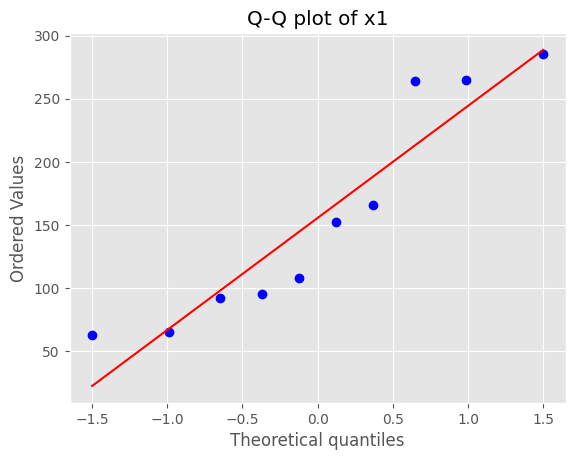

In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import probplot

# 读取数据
company_data = pd.DataFrame(
  {'x1' : [108.28, 152.36, 95.04, 65.45, 62.97, 263.99, 265.19, 285.06, 92.01, 165.68],
  'x2' : [17.05, 16.59, 10.91, 14.14, 9.52, 25.33, 18.54, 15.73, 8.10, 11.13]}
)

# 绘制Q-Q图
plt.style.use('ggplot')
probplot(company_data['x1'], dist="norm", plot=plt)
plt.title('Q-Q plot of x1')
plt.show()


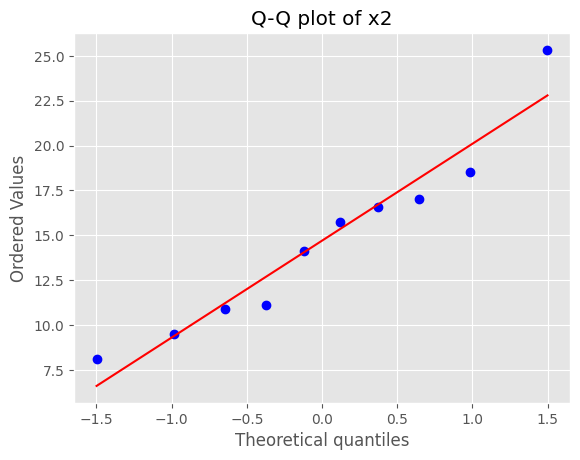

In [105]:
plt.style.use('ggplot')
probplot(company_data['x2'], dist="norm", plot=plt)
plt.title('Q-Q plot of x2')
plt.show()

Accordingly, we can get that the data is not normally distributed.<br>
That's because the *linearity* in the Q-Q plots emphasizes the normality well.

### (b)
The straightness of the Q–Q plot can be measured by calculating the correlation coefficient of the points in the plot.The correlation coefficient for the Q–Q plot is defined by $r_Q$

#### X1

In [106]:
x1 = company_data['x1']

from scipy import stats
x1_ordered = np.sort(x1)
x1_q = stats.norm.ppf((np.arange(1, len(x1) + 1) - 0.5 )/ len(x1))

rQ_x1 = np.corrcoef(x1_ordered, x1_q)[1,0]

In [107]:
rQ_x1, len(x1)

(0.9371850260956385, 10)

We have the following test:
$$H_0:\text{ It's from normal distribution vs. }H_1:\text{ It's not}$$

At the level n = 10, $$r_Q = 0.9372,$$ then we believe $$\alpha=0.01$$.<br>
In this case, the appropriate value is 0.8801.
$$r_Q > 0.8801$$
Now we fail to reject it.
So it satisfies the normality.

#### X2

In [108]:
x2 = company_data['x2']

x2_ordered = np.sort(x2)

x2_q = stats.norm.ppf( (np.arange(1, 11)- 0.5)/10 )

rQ_x2 = np.corrcoef(x2_ordered, x2_q)[1,0]

In [109]:
rQ_x2

0.969164496800138

$$H_0: \text{it's from normal distribution vs. }H_1: \text{it's not}$$

At the level n = 10, $$r_Q = 0.9372,$$ then we believe $$\alpha=0.01$$.<br>
In this case, the appropriate value is 0.8801.
$$r_Q > 0.8801$$

Failing to reject the hypothesis, we believe x2 satisties Normality.

## exercise 4.29

> Given the air-pollution data in Table 1.5, examine the pairs $X_5$ and $X_6$ for bivariate normality.
> - (a) Calculate statistical distances $$(x_j - \bar{x})^TS^{-1}(x_j - \bar{x}), j=1,2,...,42$$, where $x_j^T=[x_{j5},x_{j6}]$.
> - (b) Determine the proportion of observations $$x_j^T = [x_{j5},x_{j6}] ,j = 1,2,...42$$ , falling within the approximate 50% probability contour of a bivariate normal distribution.
> - (c) Construct a chi-square plot of the ordered distances in Part a.

In [110]:
import numpy as np
import pandas as pd
from scipy import stats

path = 'D:\A-多元统计分析\Wichern_data\Wichern_data\T1-5.dat'
df = pd.read_csv(path, sep='\s+', header=None)


In [111]:
df

,0,1,2,3,4,5,6
0,8,98,7,2,12,8,2
1,7,107,4,3,9,5,3
2,7,103,4,3,5,6,3
3,10,88,5,2,8,15,4
4,6,91,4,2,8,10,3
5,8,90,5,2,12,12,4
6,9,84,7,4,12,15,5
7,5,72,6,4,21,14,4
8,7,82,5,1,11,11,3
9,8,64,5,2,13,9,4


In [112]:
x1 = np.array(df[4])
x2 = np.array(df[5])

In [113]:
X = np.vstack((x1, x2)).T

### (a)

Attention, for j = 1, 2, 3, ..., 42, we have $x_j^T=[x_{j5},x_{j6}]$.

~~~
S表示两个向量的协方差矩阵，题目中要求解出42个distance
~~~

In [114]:
x1_de_mean = x1 - x1.mean()
x2_de_mean = x2 - x2.mean()

X_de_mean = np.vstack((x1_de_mean, x2_de_mean)).T

In [115]:
X_de_mean

array([[ 1.95238095, -1.4047619 ],
       [-1.04761905, -4.4047619 ],
       [-5.04761905, -3.4047619 ],
       [-2.04761905,  5.5952381 ],
       [-2.04761905,  0.5952381 ],
       [ 1.95238095,  2.5952381 ],
       [ 1.95238095,  5.5952381 ],
       [10.95238095,  4.5952381 ],
       [ 0.95238095,  1.5952381 ],
       [ 2.95238095, -0.4047619 ],
       [-0.04761905, -6.4047619 ],
       [ 1.95238095, -2.4047619 ],
       [ 7.95238095,  0.5952381 ],
       [ 0.95238095, -2.4047619 ],
       [-2.04761905,  0.5952381 ],
       [-1.04761905,  0.5952381 ],
       [-3.04761905, -2.4047619 ],
       [ 5.95238095, -5.4047619 ],
       [ 2.95238095, -7.4047619 ],
       [-1.04761905, -4.4047619 ],
       [ 3.95238095, -5.4047619 ],
       [-3.04761905, -3.4047619 ],
       [ 2.95238095,  1.5952381 ],
       [-5.04761905, -7.4047619 ],
       [-0.04761905, 13.5952381 ],
       [-3.04761905, -3.4047619 ],
       [ 0.95238095,  1.5952381 ],
       [-3.04761905,  0.5952381 ],
       [-1.04761905,

In [116]:
S = np.cov(x1, x2)

In [117]:
S

array([[11.36353078,  3.12659698],
       [ 3.12659698, 30.97851336]])

In [118]:
ans_list = []
for i in range(42):
    print("j=", i+1, X_de_mean[i].T @ np.linalg.inv(S) @ (X_de_mean)[i])
    ans_list.append(X_de_mean[i].T @ np.linalg.inv(S) @ (X_de_mean)[i])

j= 1 0.460652355265481
j= 2 0.6592206345785215
j= 3 2.3770609882489637
j= 4 1.6282902383679043
j= 5 0.4135363565646297
j= 6 0.47607263026524094
j= 7 1.184889461196109
j= 8 10.639179177028803
j= 9 0.13883386298670963
j= 10 0.8162468152098796
j= 11 1.3566300591687885
j= 12 0.6228095781062668
j= 13 5.649439150827316
j= 14 0.3159498385121218
j= 15 0.4135363565646297
j= 16 0.12249733044955188
j= 17 0.8987982257829784
j= 18 4.76468729853035
j= 19 3.0089121860384256
j= 20 0.6592206345785215
j= 21 2.774141553358871
j= 22 1.036006095235068
j= 23 0.7874152446997651
j= 24 3.443774800380247
j= 25 6.1488605925448985
j= 26 1.036006095235068
j= 27 0.13883386298670963
j= 28 0.8856041172444512
j= 29 0.13797190219226882
j= 30 2.2488867394063297
j= 31 0.19011883348272043
j= 32 0.460652355265481
j= 33 1.1471939473982804
j= 34 7.085723743894751
j= 35 1.458422878027238
j= 36 0.12249733044955188
j= 37 1.8984708313214445
j= 38 2.778259621957509
j= 39 8.473064913506189
j= 40 0.6370217505752357
j= 41 0.70324850

### (b)
~~~
旨在计算落在正态分布的50%概率区域内的数据点数量。要求你计算在42个观察值中，有多少个观察值位于二元正态分布的50%概率轮廓内，然后将这个数量除以42得到比例。
~~~

In [119]:
stats.chi2.ppf(0.5, 2)

1.386294361119891

> The number of observations whose generalized distances are less than $X^2_2(0.5)$ = 1.3863 is XXX. So the proportion is XXX/42= xxx

In [120]:
(ans_list <= stats.chi2.ppf(0.5, 2) ).sum()

26

In [121]:
26/42

0.6190476190476191

The proportion is 26/42 = 0.62

### (c)
~~~
Python直接手撕吧
~~~

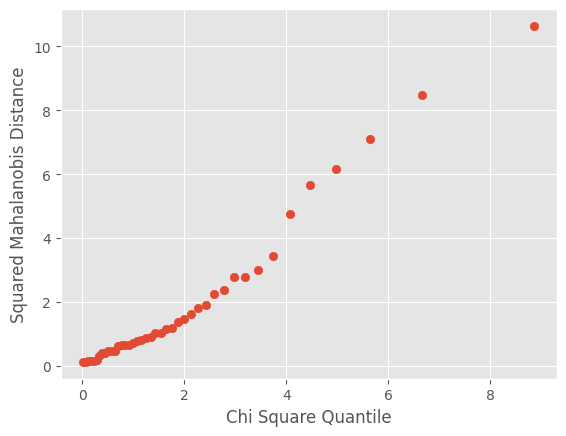

In [122]:
ordered = np.sort(ans_list)
q = stats.chi2.ppf( ( np.arange(42) + 0.5 )/42 , 2)

import matplotlib.pyplot as plt
plt.scatter(q, ordered)
plt.ylabel('Squared Mahalanobis Distance')
plt.xlabel('Chi Square Quantile')
plt.show()

## exercise 4.39

> The data in **Table 4.6** (see the psychological profile data: www.prenhall.com/statistics) consist of 130 observations generated by scores on a psychological test administered to Peruvian teenagers (ages 15, 16, and 17). For each of these teenagers the gender (male= 1, female= 2) and socioeconomic status (low= 1, medium= 2) were also recorded. The scores were accumulated into five subscale scores labeled independence (indep), support (supp), benevolence (benev), conformity (conform), and leadership (leader)
>
> - (a) Examine each of the variables independence, support, benevolence, conformity and
leadership for marginal normality.
> - (b) Using all five variables, check for multivariate normality.
> - (c) Refer to part (a). For those variables that are nonnormal, determine the transformation
that makes them more nearly normal

In [123]:
import numpy as np
import pandas as pd
from scipy import stats

path = 'D:\A-多元统计分析\Wichern_data\Wichern_data\T4-6.DAT'

data = pd.read_csv(path, sep= '\s+', header= None)
data.columns= ['Indep', 'Supp', 'Benev', 'Conform', 'Leader', 'Gender', 'Socio']

In [124]:
data

,Indep,Supp,Benev,Conform,Leader,Gender,Socio
0,27,13,14,20,11,2,1
1,12,13,24,25,6,2,1
2,14,20,15,16,7,2,1
3,18,20,17,12,6,2,1
4,9,22,22,21,6,2,1
...,...,...,...,...,...,...,...
125,10,11,26,17,10,1,2
126,14,12,14,11,29,1,2
127,19,11,23,18,13,2,2
128,27,19,22,7,9,2,2


### (a)
Examine the marginal Normality.

$H_0: \text{They all satisfy marginal normality}\text{ vs. }H_1: \text{they do not}$

With the size of data is 130, we choose the Significance level $\alpha=0.01$. <br>
Then the critical point value is 0.9879

In [125]:
q = (np.arange(1,131)-0.5)/130
q = stats.norm.ppf(q)

#### Independence

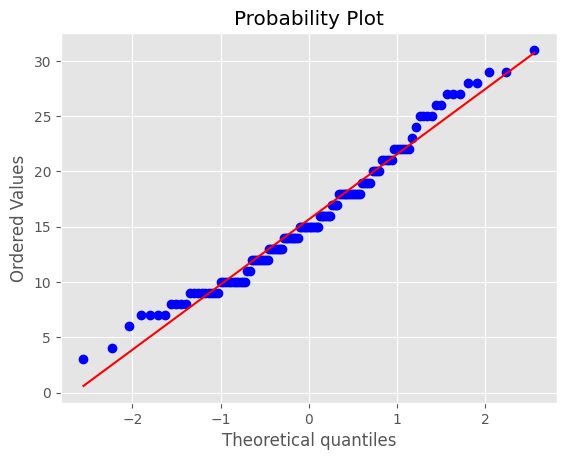

In [126]:
plt.style.use('ggplot')
stats.probplot(data['Indep'], plot=plt)
plt.show()

In [127]:
np.corrcoef(np.sort(data['Indep']), q)

array([[1.        , 0.98813014],
       [0.98813014, 1.        ]])

#### Support

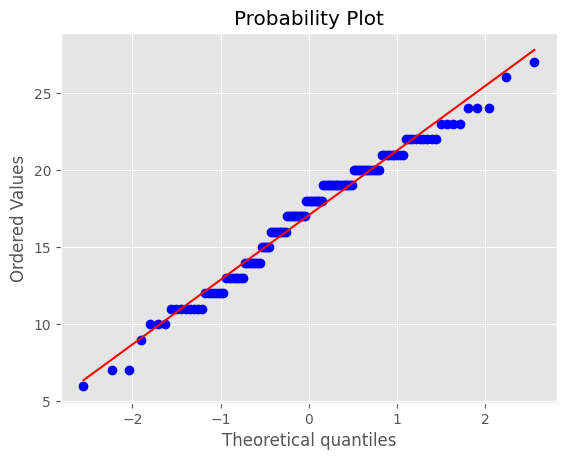

In [128]:
plt.style.use('ggplot')
stats.probplot(data['Supp'], plot=plt)
plt.show()

In [129]:
np.corrcoef(np.sort(data['Supp']), q)

array([[1.      , 0.989288],
       [0.989288, 1.      ]])

#### Benevolence


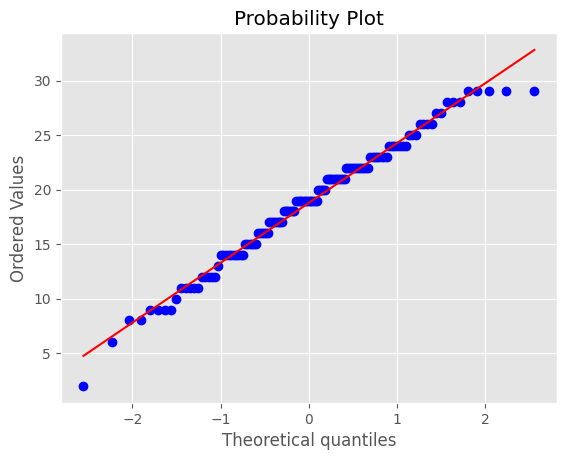

In [130]:
plt.style.use('ggplot')
stats.probplot(data['Benev'], plot=plt)
plt.show()

In [131]:
np.corrcoef(np.sort(data['Benev']), q)

array([[1.        , 0.99250856],
       [0.99250856, 1.        ]])

#### Comformity

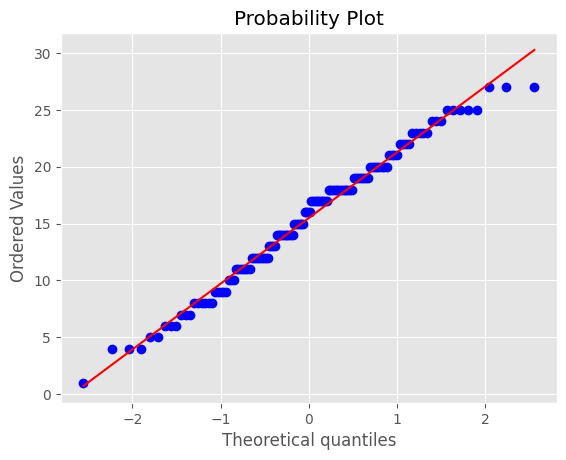

In [132]:
plt.style.use('ggplot')
stats.probplot(data['Conform'], plot=plt)
plt.show()

In [133]:
np.corrcoef(np.sort(data['Conform']), q)

array([[1.        , 0.99337999],
       [0.99337999, 1.        ]])

Obviously, the marginal normality is vaild.<br>
Every corr is above the critical value.<br>

We fail to reject it. $$\text{They are marginally normal.}$$

### (b)

First, we do some preprocessing.

In [134]:
X = np.array(data.iloc[:, 0:5])

In [135]:
X

array([[27, 13, 14, 20, 11],
       [12, 13, 24, 25,  6],
       [14, 20, 15, 16,  7],
       [18, 20, 17, 12,  6],
       [ 9, 22, 22, 21,  6],
       [18, 15, 17, 25,  9],
       [12, 18, 29, 18,  4],
       [10, 19, 21, 10, 16],
       [ 8, 23, 23, 19,  9],
       [21, 11, 17,  9, 16],
       [15, 16, 16, 12, 19],
       [ 9, 20, 29, 14,  7],
       [16, 22, 24, 17,  4],
       [14, 19, 17, 18, 15],
       [13, 26, 23, 17,  5],
       [13, 20, 22, 18,  5],
       [18, 17, 11, 23, 14],
       [15, 24, 15,  8, 15],
       [18, 22, 24, 11,  6],
       [18, 18, 17, 24,  7],
       [ 9, 16, 27, 18,  9],
       [25, 17, 15, 14, 14],
       [ 9, 21, 21, 18,  4],
       [28, 17, 19, 12,  7],
       [18, 18, 26, 14,  6],
       [25, 13, 11, 20,  6],
       [ 6, 16, 22, 23, 15],
       [25, 13, 18,  9, 15],
       [ 4, 23, 27, 16,  8],
       [17,  7, 19, 22, 12],
       [13, 14, 16, 20, 16],
       [14, 16, 21, 19, 10],
       [17, 12, 22, 19, 12],
       [14, 16, 19, 18, 13],
       [10, 19

In [136]:
S = np.cov(X.T)
S

array([[ 34.75020871,  -4.27668456, -18.07179487, -15.97286822,
          5.71645796],
       [ -4.27668456,  17.51341682,   0.41979726,  -7.86821705,
         -8.72331544],
       [-18.07179487,   0.41979726,  29.84472272,   9.34883721,
        -13.94215862],
       [-15.97286822,  -7.86821705,   9.34883721,  33.04263566,
         -9.94186047],
       [  5.71645796,  -8.72331544, -13.94215862,  -9.94186047,
         26.95796064]])

In [137]:
ans_list = []
X_mean = X.mean(axis=0)

In [138]:
for i in range(130):
    distance = (X[i]- X_mean).T @ np.linalg.inv(S) @ (X[i]- X_mean)
    ans_list.append(distance)

In [139]:
q = ( np.arange(130)+0.5 )/130
q = stats.chi2.ppf(q, 5)

ordered = np.sort(ans_list)

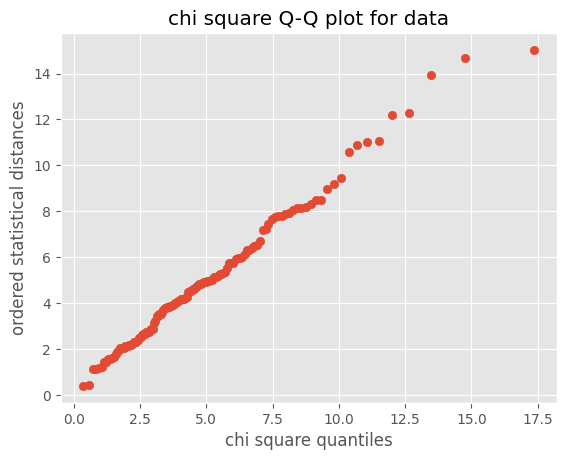

In [140]:
plt.style.use('ggplot')
plt.scatter(q, ordered)
plt.ylabel('ordered statistical distances')
plt.xlabel('chi square quantiles')
plt.title('chi square Q-Q plot for data')
plt.show()

### (c)
Using the rQ statistic, normality is rejected at the 5% level for leadership.


In [141]:
np.corrcoef(ordered, q)

array([[1.        , 0.99623664],
       [0.99623664, 1.        ]])

 If leadership is transformed by taking the square root (i.e. 1 = 0.5), rQ = 0.996 and we cannot reject normality at the 5% level, because the critical point is below the $Corr$ we get.

In [148]:
leader = np.array(data['Leader'])

leader = stats.boxcox(leader)[0]

In [149]:
q = (np.arange(130)+0.5)/130
q = stats.norm.ppf(q)

In [151]:
np.corrcoef(np.sort(leader), q)

array([[1.       , 0.9964521],
       [0.9964521, 1.       ]])